In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading CSV file
stroke_data = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

# Inspecting the first rows
print(stroke_data.head())


      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [9]:
print(stroke_data.info())  # Check data types and null values

print(stroke_data.describe())  # Summary statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None
                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354   

In [10]:
# Cleaning the data
# Checking missing values
print(stroke_data.isnull().sum())


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [11]:

# Removing rows with missing values in bmi column
stroke_data_cleaned = stroke_data.dropna(subset=['bmi'])


print(stroke_data_cleaned.isnull().sum())

# Remove rows where gender is 'Other', only 1 column no needed
stroke_data_cleaned = stroke_data_cleaned[stroke_data_cleaned['gender'] != 'Other']



id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [12]:
print(stroke_data_cleaned.duplicated().sum())

0


# **EXPLATORY DATA ANALYSIS**

In [13]:
numerical_columns = ['age', 'avg_glucose_level', 'bmi']

for col in numerical_columns:
    mean = np.mean(stroke_data_cleaned[col])
    median = np.median(stroke_data_cleaned[col].dropna())  # Exclude NaN for median
    std_dev = np.std(stroke_data_cleaned[col], ddof=1)  # Sample standard deviation

    print(f"  Column: {col}")
    print(f"  Mean: {mean:.2f}")
    print(f"  Median: {median:.2f}")
    print(f"  Standard Deviation: {std_dev:.2f}\n")



  Column: age
  Mean: 42.87
  Median: 44.00
  Standard Deviation: 22.56

  Column: avg_glucose_level
  Mean: 105.30
  Median: 91.68
  Standard Deviation: 44.43

  Column: bmi
  Mean: 28.89
  Median: 28.10
  Standard Deviation: 7.85



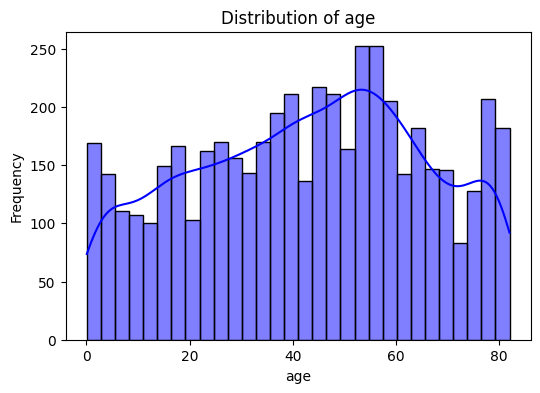

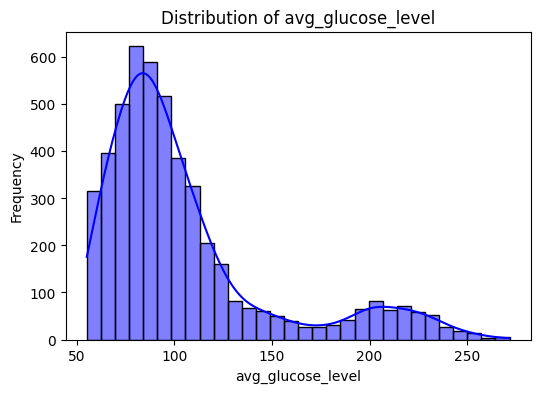

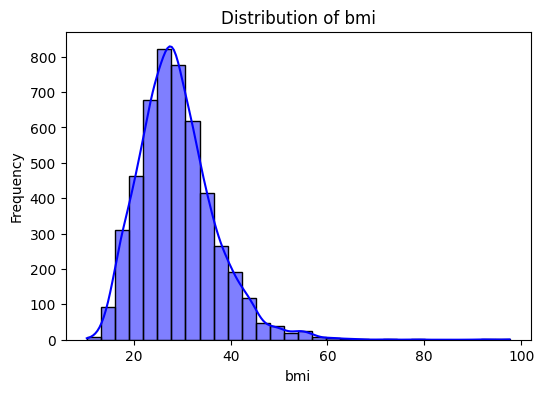

In [14]:
# 4. Numerical variable distributions (Histograms)
selected_cols = ['age', 'avg_glucose_level', 'bmi']
for col in selected_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(stroke_data_cleaned[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

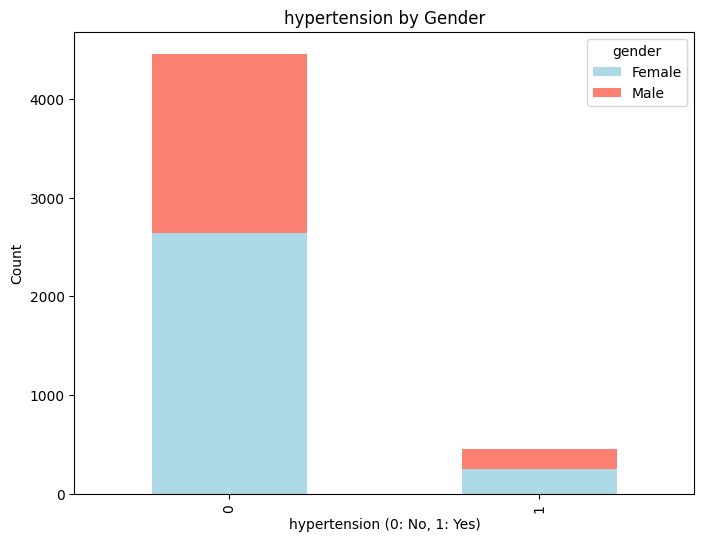

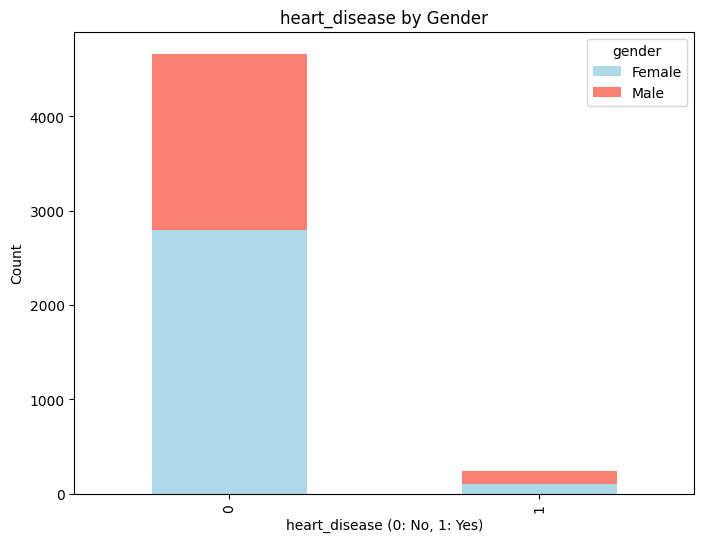

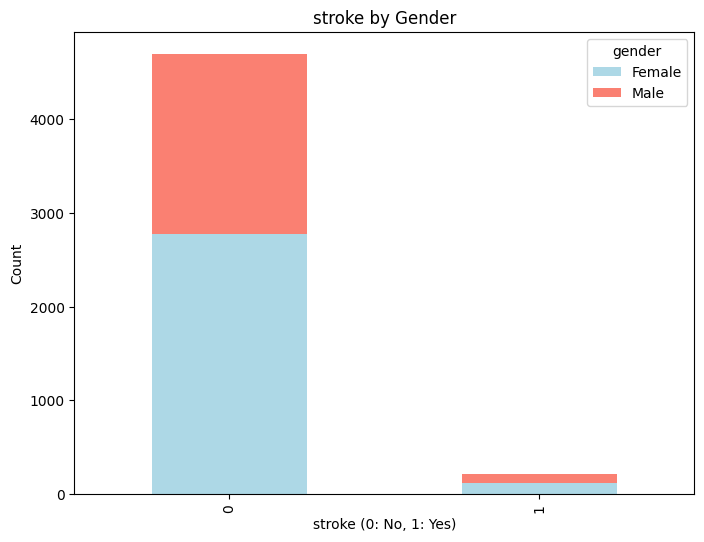

In [15]:
boolean_cols = ['hypertension', 'heart_disease', 'stroke']
for col in boolean_cols:
    crosstab = pd.crosstab(stroke_data_cleaned[col], stroke_data_cleaned['gender'])
    crosstab.plot(kind='bar', stacked=True, figsize=(8, 6), color=['lightblue', 'salmon'])
    plt.title(f'{col} by Gender')
    plt.xlabel(f'{col} (0: No, 1: Yes)')
    plt.ylabel('Count')
    plt.legend(title='gender')
    plt.show()




<ipython-input-16-10d70c9b3346>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='work_type', data=stroke_data_cleaned, palette='viridis')


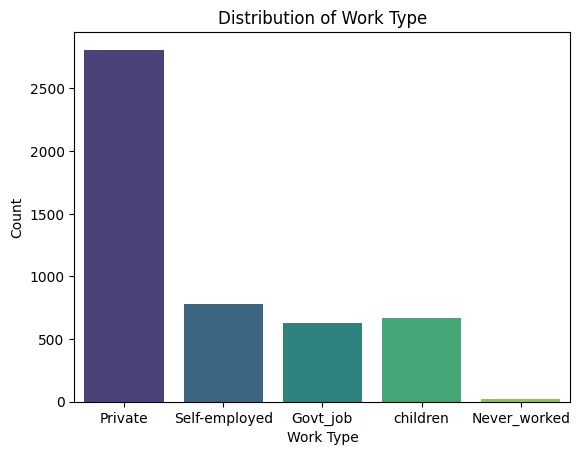

<ipython-input-16-10d70c9b3346>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoking_status', data=stroke_data_cleaned, palette='viridis')


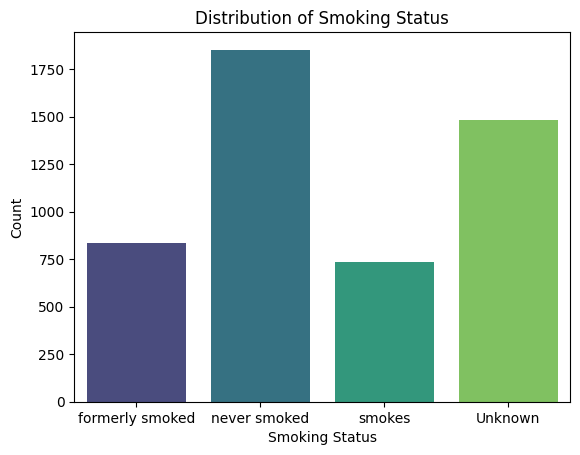

<ipython-input-16-10d70c9b3346>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ever_married', data=stroke_data_cleaned, palette='viridis')


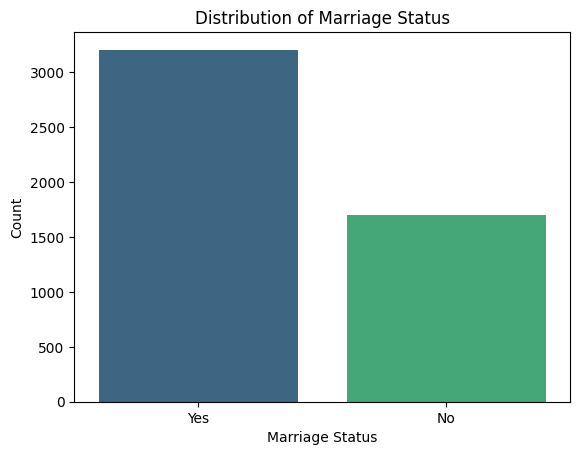

In [16]:
sns.countplot(x='work_type', data=stroke_data_cleaned, palette='viridis')
plt.title('Distribution of Work Type')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.show()

sns.countplot(x='smoking_status', data=stroke_data_cleaned, palette='viridis')
plt.title('Distribution of Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()

sns.countplot(x='ever_married', data=stroke_data_cleaned, palette='viridis')
plt.title('Distribution of Marriage Status')
plt.xlabel('Marriage Status')
plt.ylabel('Count')
plt.show()


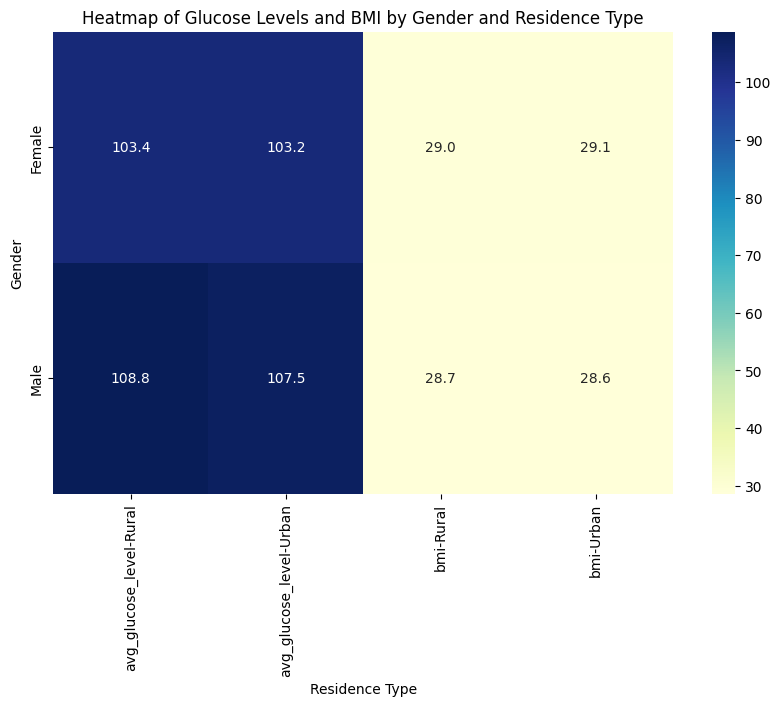

In [17]:

# Create a pivot table: average glucose and BMI by gender and residence type
heatmap_data = stroke_data_cleaned.pivot_table(
    values=['avg_glucose_level', 'bmi'],
    index='gender',
    columns='Residence_type',
    aggfunc='mean'
)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Heatmap of Glucose Levels and BMI by Gender and Residence Type')
plt.ylabel('Gender')
plt.xlabel('Residence Type')
plt.show()


# **DATA ANALYSIS**

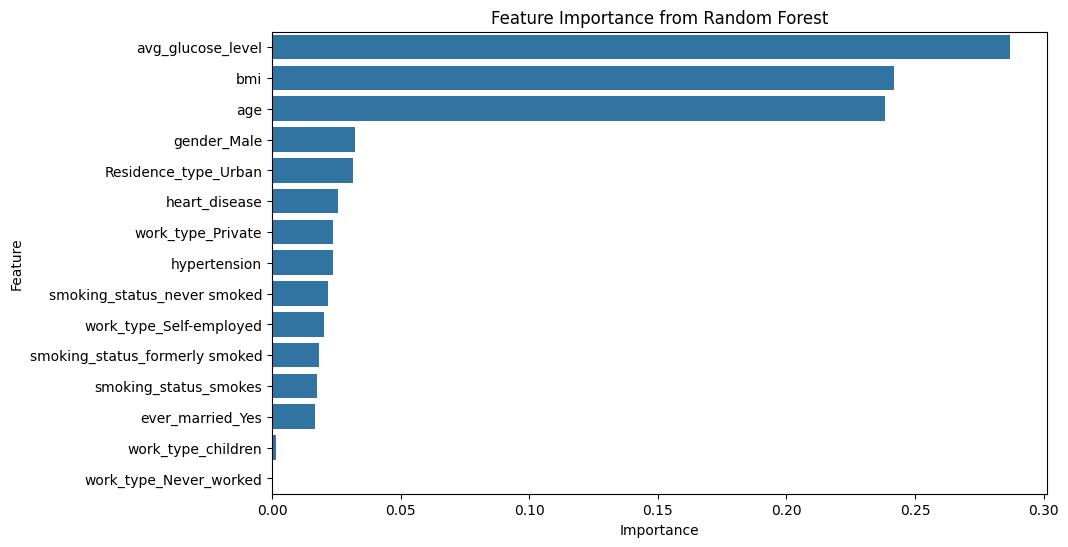

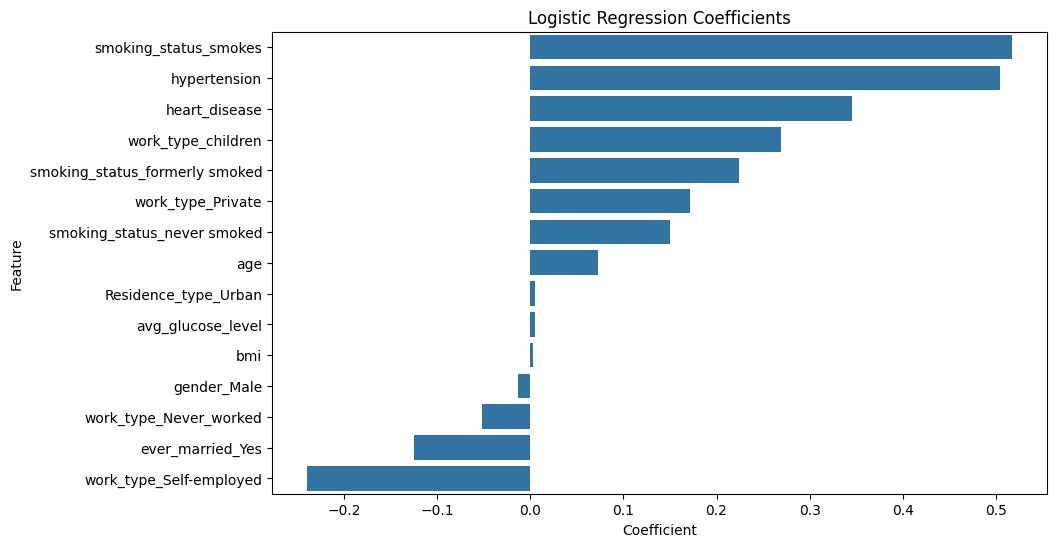

One-way ANOVA result for age: F-statistic = 279.87841499632003, p-value = 3.8408903844855186e-61
Chi-Square Test for Gender and Stroke: Chi2 = 0.16955129804441268, p-value = 0.6805108914997836


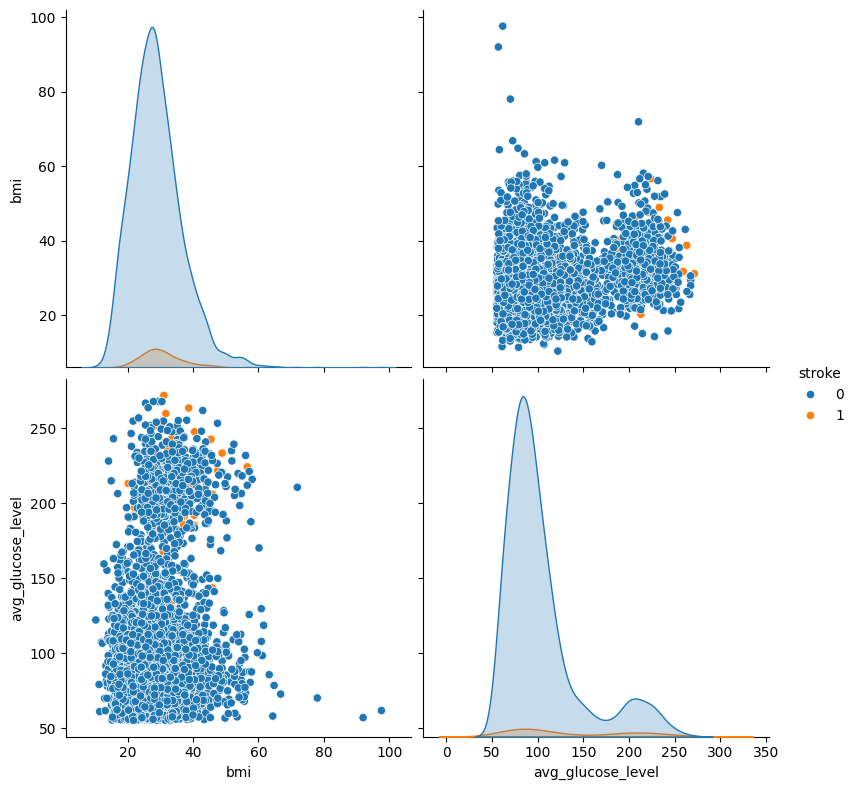

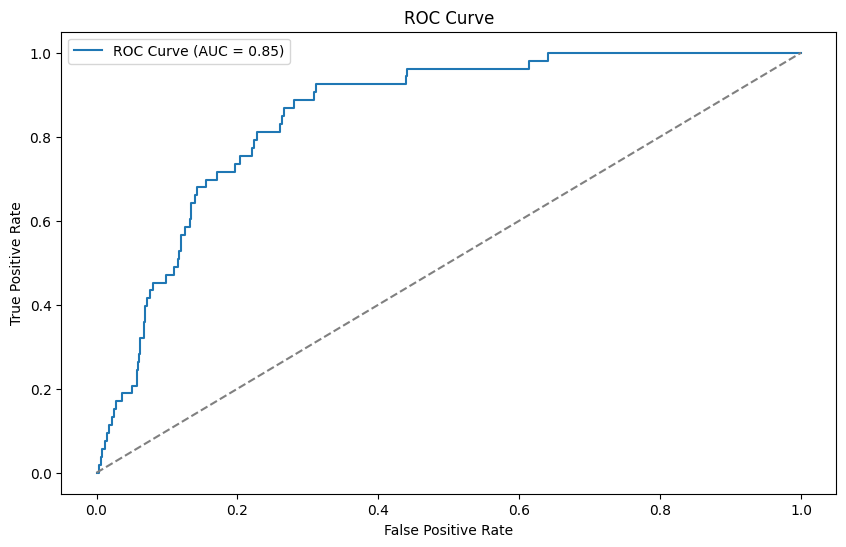

Optimal Threshold for Stroke Prediction: 0.03


In [18]:

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from scipy.stats import chi2_contingency, f_oneway

# Encode categorical variables
data_encoded = pd.get_dummies(stroke_data_cleaned, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)

# Define features and target
X = data_encoded.drop(columns=['id', 'stroke'])
y = data_encoded['stroke']

# Step 2: Feature Importance Analysis (Random Forest)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance from Random Forest')
plt.show()

# Step 3: Logistic Regression Analysis
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X, y)
coefs = pd.DataFrame({'Feature': X.columns, 'Coefficient': log_model.coef_[0]}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefs)
plt.title('Logistic Regression Coefficients')
plt.show()

# Step 4: ANOVA for Demographic Analysis
# One-way ANOVA for Age across Stroke Status
anova_result = f_oneway(stroke_data_cleaned[stroke_data_cleaned['stroke'] == 1]['age'], stroke_data_cleaned[stroke_data_cleaned['stroke'] == 0]['age'])
print(f"One-way ANOVA result for age: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")

# Two-way ANOVA setup (e.g., group and gender effects)
gender_stroke_table = pd.crosstab(stroke_data_cleaned['gender'], stroke_data_cleaned['stroke'])
chi2, p, dof, expected = chi2_contingency(gender_stroke_table)
print(f"Chi-Square Test for Gender and Stroke: Chi2 = {chi2}, p-value = {p}")

# Step 5: Correlation and Threshold Analysis
sns.pairplot(stroke_data_cleaned, vars=['bmi', 'avg_glucose_level'], hue='stroke', height=4)
plt.show()

# ROC Curve
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_model.fit(X_train, y_train)
y_pred_prob = log_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Optimal Threshold
i_opt = np.argmax(tpr - fpr)
optimal_threshold = thresholds[i_opt]
print(f"Optimal Threshold for Stroke Prediction: {optimal_threshold:.2f}")


In [19]:
# T-Test for Glucose Level and BMI Between Stroke and Non-Stroke Groups
from scipy.stats import ttest_ind

# Split data into stroke and non-stroke groups
stroke_group = stroke_data_cleaned[stroke_data_cleaned['stroke'] == 1]
non_stroke_group = stroke_data_cleaned[stroke_data_cleaned['stroke'] == 0]

# T-Test for Glucose Level
print("T-Test for Average Glucose Level:")
glucose_ttest = ttest_ind(stroke_group['avg_glucose_level'], non_stroke_group['avg_glucose_level'])
print(f"T-statistic: {glucose_ttest.statistic}, P-value: {glucose_ttest.pvalue}")

# T-Test for BMI
print("\nT-Test for BMI:")
bmi_ttest = ttest_ind(stroke_group['bmi'], non_stroke_group['bmi'])
print(f"T-statistic: {bmi_ttest.statistic}, P-value: {bmi_ttest.pvalue}")

# Interpretation:
if glucose_ttest.pvalue < 0.05:
    print("The difference in average glucose levels between stroke and non-stroke groups is statistically significant.")
else:
    print("The difference in average glucose levels between stroke and non-stroke groups is not statistically significant.")

if bmi_ttest.pvalue < 0.05:
    print("The difference in BMI between stroke and non-stroke groups is statistically significant.")
else:
    print("The difference in BMI between stroke and non-stroke groups is not statistically significant.")


T-Test for Average Glucose Level:
T-statistic: 9.830215360205345, P-value: 1.3476353968167712e-22

T-Test for BMI:
T-statistic: 2.968365485973203, P-value: 0.003008355955526417
The difference in average glucose levels between stroke and non-stroke groups is statistically significant.
The difference in BMI between stroke and non-stroke groups is statistically significant.


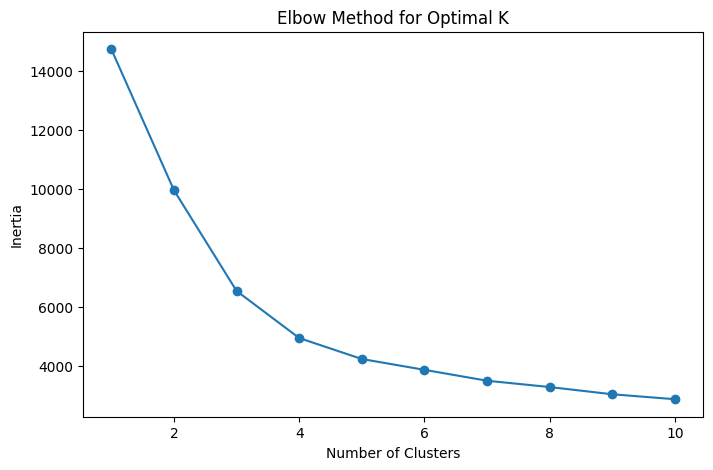

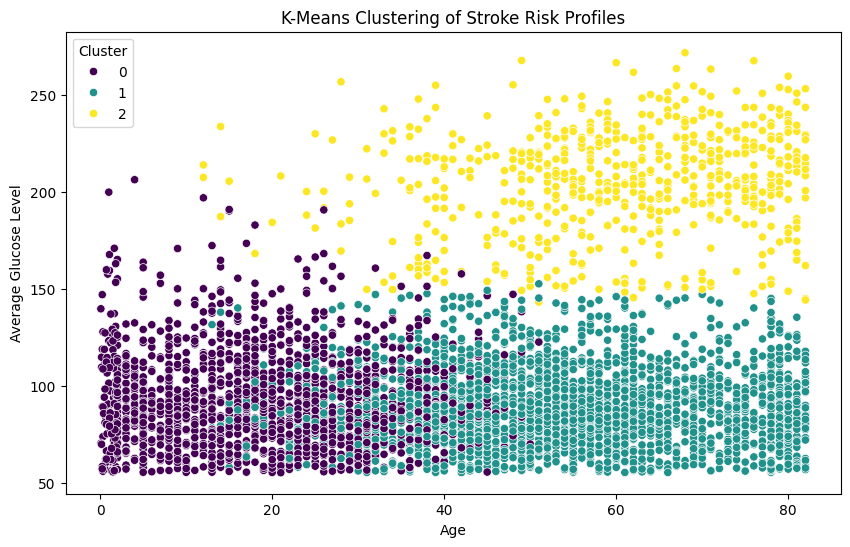

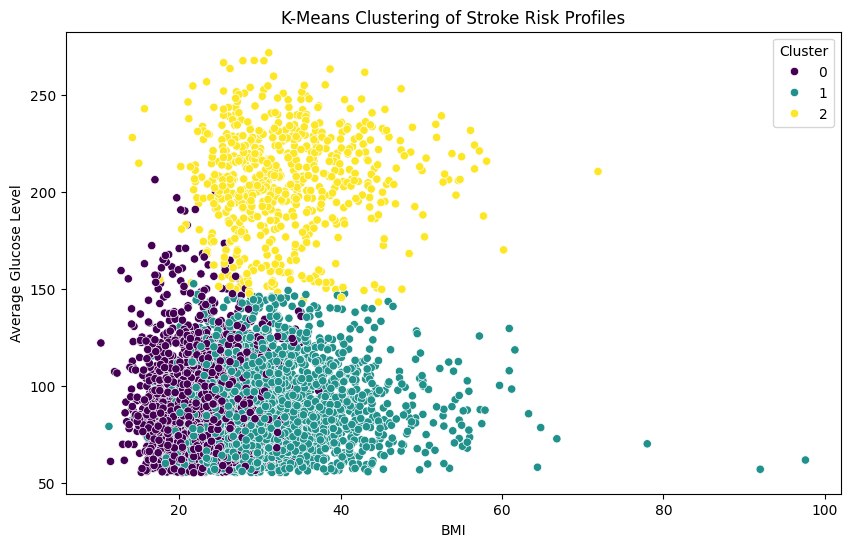

Cluster Profiles:
               age  avg_glucose_level        bmi
Cluster                                         
0        18.847053          92.719731  22.712373
1        54.021522          89.119093  31.766833
2        60.513428         205.042117  33.427172


In [20]:
# K-Means Clustering to Identify Stroke Risk Profiles
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant features for clustering
features = stroke_data_cleaned[['age', 'avg_glucose_level', 'bmi']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Based on the elbow curve, select the optimal number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
stroke_data_cleaned['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=stroke_data_cleaned, x='age', y='avg_glucose_level', hue='Cluster', palette='viridis')
plt.title('K-Means Clustering of Stroke Risk Profiles')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.legend(title='Cluster')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=stroke_data_cleaned, x='bmi', y='avg_glucose_level', hue='Cluster', palette='viridis')
plt.title('K-Means Clustering of Stroke Risk Profiles')
plt.xlabel('BMI')
plt.ylabel('Average Glucose Level')
plt.legend(title='Cluster')
plt.show()

# Analyze cluster profiles
cluster_profiles = stroke_data_cleaned.groupby('Cluster')[['age', 'avg_glucose_level', 'bmi']].mean()
print("Cluster Profiles:")
print(cluster_profiles)


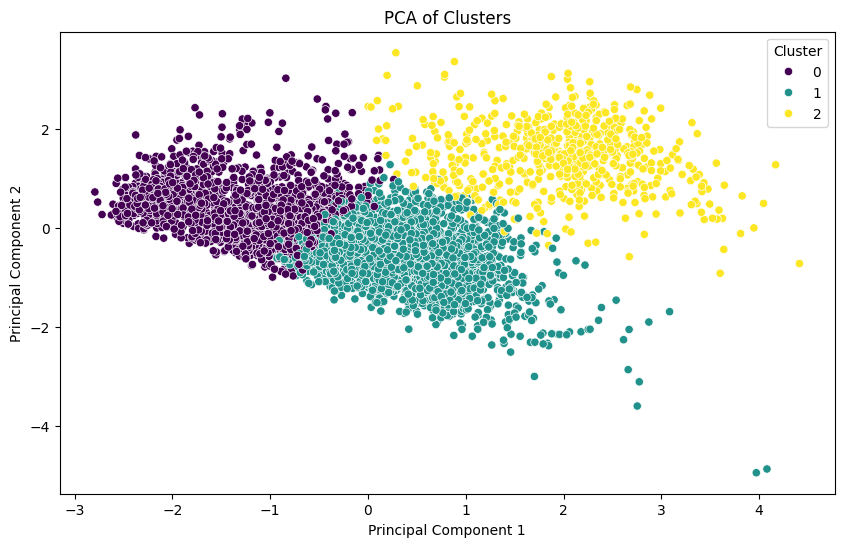

Cluster Patterns:
               age                         avg_glucose_level             \
              mean        std    min   max              mean        std   
Cluster                                                                   
0        18.847053  12.218730   0.08  55.0         92.719731  23.949850   
1        54.021522  15.454623  13.00  82.0         89.119093  19.884184   
2        60.513428  14.862350  12.00  82.0        205.042117  26.794301   

                               bmi                        
            min     max       mean       std   min   max  
Cluster                                                   
0         55.12  206.25  22.712373  4.485052  10.3  37.3  
1         55.22  152.56  31.766833  7.173703  11.3  97.6  
2        143.15  271.74  33.427172  7.632394  14.2  71.9  


In [21]:
from sklearn.decomposition import PCA

# Select relevant features
features = stroke_data_cleaned[['age', 'avg_glucose_level', 'bmi']]

# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
stroke_data_cleaned['Cluster'] = kmeans.fit_predict(scaled_features)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
stroke_data_cleaned['PCA1'] = pca_result[:, 0]
stroke_data_cleaned['PCA2'] = pca_result[:, 1]

# Visualize clusters with PCA components
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=stroke_data_cleaned, palette='viridis')
plt.title('PCA of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Analyze patterns within clusters
cluster_patterns = stroke_data_cleaned.groupby('Cluster')[['age', 'avg_glucose_level', 'bmi']].agg(['mean', 'std', 'min', 'max'])
print("Cluster Patterns:")
print(cluster_patterns)
